In [1]:
import nbsetup
import torch
import math
import matplotlib.pyplot as plt

# ICP

Intracranial pressure (ICP) is measured by lumbar puncture during infusion tests, at a sampling frequency $f_s \simeq 100 Hz$.

### Reading infusion tests

In [10]:
import icp.loader as hdf5
f = hdf5.File(1)

> loaded 400 points at 100 Hz:


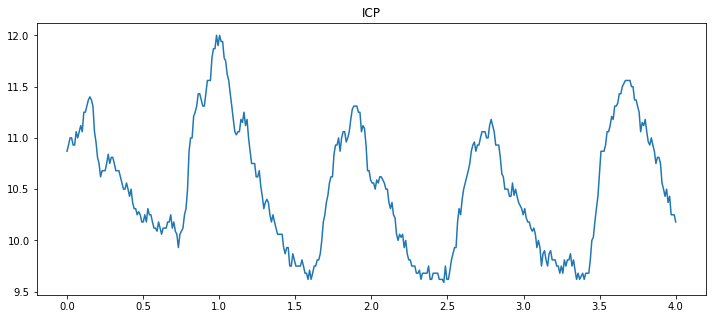

In [17]:
N = 400
fs = 100 
icp = f.icp(N)
t = torch.linspace(0, N/fs, N)

plt.figure(figsize=(12, 5))
plt.plot(t, icp)
plt.title('ICP')
print(f'> loaded {N} points at 100 Hz:')

### Spectral filtering

In [30]:
from torch.fft import fft, ifft, rfft, irfft
from sig.filter import Filter

In [31]:
kernel = Filter(torch.tensor([0.15, 0.2, 0.3, 0.2, 0.15]))
icp_f = kernel(icp)

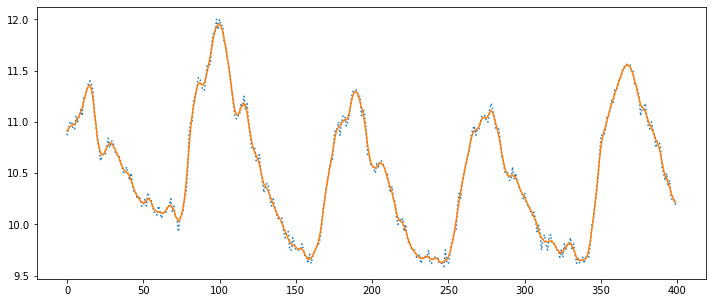

In [32]:
plt.figure(figsize=(12, 5))
plt.plot(icp, linestyle='dotted')
plt.plot(icp_f)

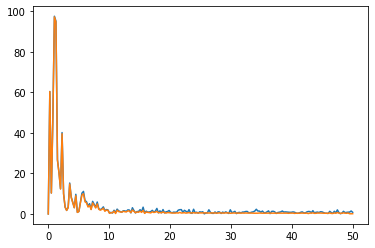

In [29]:
def fourier(tensor, f1, fmax=100):
    N = tensor.shape[0]
    return rfft(center(tensor))[:math.floor(N * f1 /(2 * fmax))]

 
fcut = 100
_icp = fourier(icp, fcut)
_icp_f = fourier(icp_f, fcut)
sp = spectrum(_icp, fcut)

plt.plot(sp, _icp.abs())
plt.plot(sp, _icp_f.abs())